<h1 style="text-align: center;">Simulación y aplicaciones en ciencias sociales y experimentales
</h3>
<h3 style="text-align: center;"> Tema 2.2 Modelos deterministas de segundo orden </h3>
<h3 style="text-align: center;"> Ejercicios 2 </h3>

### Ejercicio 1

En este ejercicio presentamos el modelo biológico de __Lotka-Volterra__, que representa la dinámica de dos especies, en la cual una es el depredador de la otra. El modelo pretende explicar cómo al abundancia de una especie y otra se van alternando con el tiempo. Por ejemplo, el siguiente gráfico muestra los registros de las poblaciones del lince canadiense y la liebre de patas blancas recogidos por la compañía Hudson Bay a lo largo de un siglo:

![alt text](https://services.math.duke.edu/education/ccp/materials/engin/predprey/lynxhare.gif)

Se puede comprobar que existe un comportamiento oscilatorio interrelacionado en ambas especies.

El modelo de __Lotka-Volterra__ incluye varias suposiciones que hay que tener en cuenta: 

* La población de las liebres crece ilimitadamente en ausencia de linces.
* Los linces depeden de las liebres para sobrevivir.

Entonces, dadas $x_1(t)$ e $x_2(t)$ la población de la presa (liebres) y depredador (lince), la tasa de crecimiento de estas especies es: 

$$\frac{dx_1}{dt} = rx_1-ax_1x_2,\\ \frac{dx_2}{dt} = bx_1x_2-mx_2,$$

donde $x_1$ y $x_2$ indican las poblaciones (en número) de liebres y linces, respectivamente. El parámetro $r$ es la tasa de crecimiento de las liebres, $m$ es la tasa de mortalidad de los linces si no encuentran presas, $a$ es la tasa de mortalidad de las liebres debido a los encuentros con linces y $b$ indican la sobrevivencia de los linces debida a los encuentros con liebres. 

Entonces, 

**(a)** Simular el modelo y observar si representa los datos reales.

**(b)** Estudiar el efecto del tiempo de paso en la simulación.

**(c)** Simular el modelo con los método de Runge Kutta.


In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def pp_model(r, a, b, m):
    def f(x, t):
        x1 = r*x[0] - a*x[0]*x[1]
        x2 = b*x[0]*x[1] - m*x[1]
        return np.array([x1, x2])
    return f

In [4]:
def solve_ode(model, x0, t):
    n = len(t)
    x = np.zeros((n, len(x0)))
    x[0] = x0
    for i in range(n-1):
        dt = t[i+1] - t[i]
        x[i+1] = x[i] + dt * model(x[i], t[i])
    return x

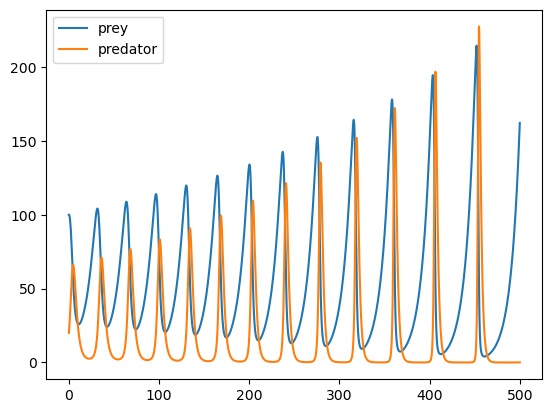

In [5]:
dt = 0.1
t = np.linspace(0, 500, int(500/dt+1))

r = 0.1
a = 0.005
b = 0.009
m = 0.5

x0 = [100, 20]

x = solve_ode(pp_model(r, a, b, m), x0, t)

lines = plt.plot(t, x)
plt.legend(lines, ["prey", "predator"])
plt.show()

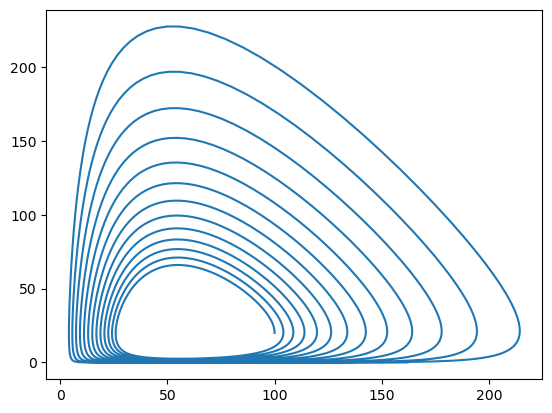

In [6]:
plt.plot(x[:,0], x[:,1])
plt.show()

In [7]:
dts = [1e-1, 1e-2, 1e-3]

sols = []

for dt in dts:
    t = np.linspace(0, 300, int(300/dt+1))
    x = solve_ode(pp_model(r,a,b,m), x0, t)
    sols.append((t,x))

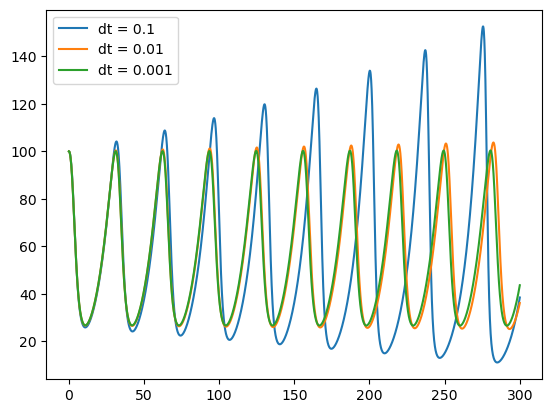

In [8]:
for t, x in sols:
    plt.plot(t,x[:,0])
plt.legend([f"dt = {dt}" for dt in dts])
plt.show()

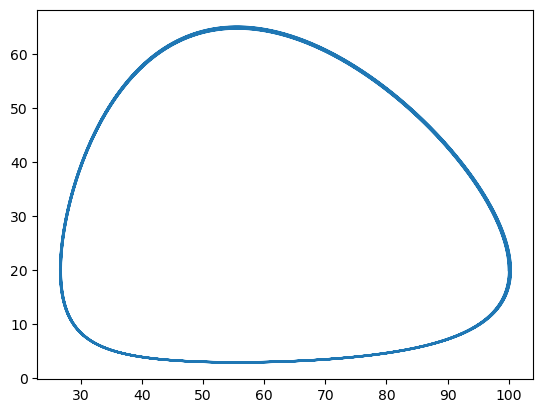

In [9]:
t, x = sols[-1]
plt.plot(x[:,0], x[:,1])
plt.show()

In [10]:
def solve_rk(model, x0, t):
    n = len(t)
    x = np.zeros((n, len(x0)))
    x[0] = x0
    for i in range(n-1):
        dt = t[i+1] - t[i]
        k1 = model(x[i], t[i])
        k2 = model(x[i]+dt*k1/2, t[i]+dt/2)
        k3 = model(x[i]+dt*k2/2, t[i]+dt/2)
        k4 = model(x[i]+dt*k3, t[i]+dt)
        x[i+1] = x[i] + dt/6 * (k1+2*k2+2*k3+k4) 
    return x

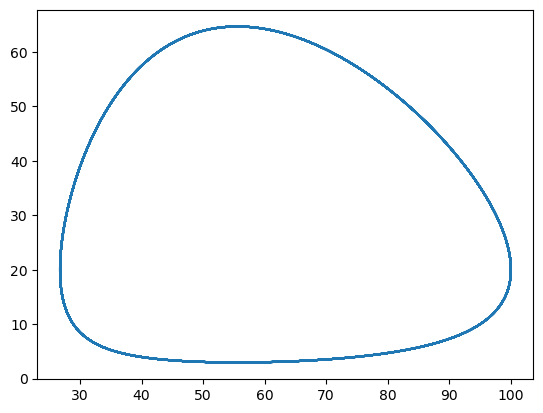

In [11]:
t = np.linspace(0,500,5001)
x = solve_rk(pp_model(r,a,b,m), x0, t)

plt.plot(x[:,0], x[:,1])

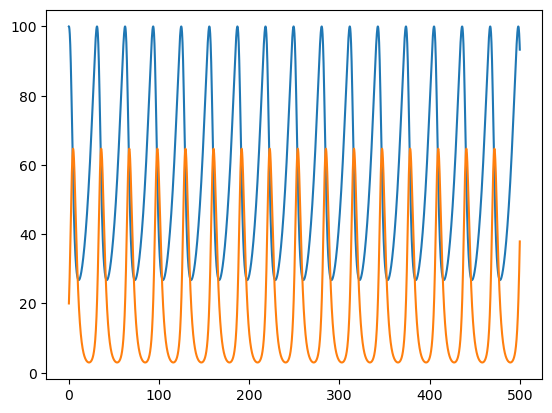

In [12]:
plt.plot(t, x)

### Ejercicio 2

Dado el modelo de depredador-presa de Lotka-Volterra, 

$$\frac{dx_1}{dt} = rx_1-ax_1x_2,\\ \frac{dx_2}{dt} = bx_1x_2-mx_2,$$

donde $x_1$ y $x_2$ indican las poblaciones (en número) de liebres y linces, respectivamente. 

**(a)** Hallar el espacio de fases para distintas condiciones iniciales de las especies. 

**(b)** Considerar que las presas (liebres) siguen un patrón de crecimiento logístico, no lineal. Comprobar la trayectoria de ambas especies a largo plazo. 

**(c)** Considerar que los depredadores (linces) tienen una capacidad limitada de ingesta de liebres por periodo de tiempo.  

In [39]:
def lv2_model(r, k, a, b, m):
    def f(x, *args):
        x0 = r*x[0]*(1-x[0]/k) - a*x[0]*x[1]
        x1 = b*x[0]*x[1] - m*x[1]
        return  np.array([x0, x1])
    return f

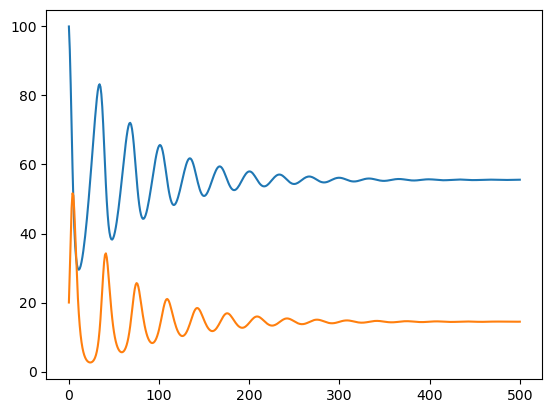

In [40]:
r = 0.1
k = 200
a = 0.005
b = 0.009
m = 0.5

x0 = np.array([100, 20])
t = np.linspace(0, 500, 501)


x = solve_rk(lv2_model(r,k,a,b,m), x0, t)

plt.plot(t, x)
plt.show()

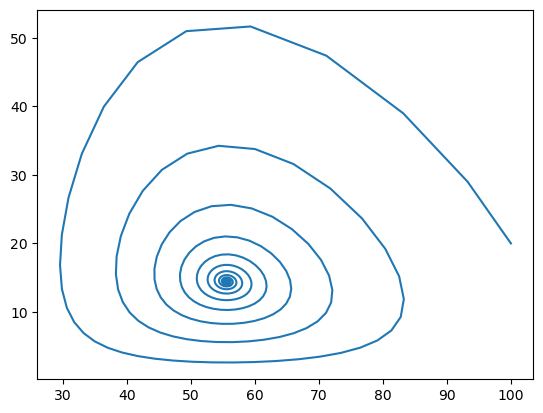

In [41]:
plt.plot(x[:,0], x[:,1])

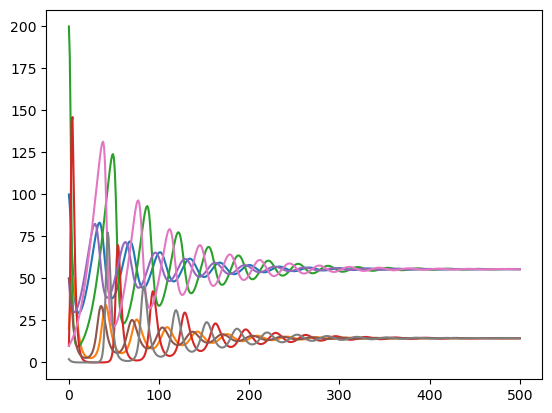

In [42]:
x0s = [
    np.array([100, 20]),
    np.array([200, 10]),
    np.array([50, 50]),
    np.array([10, 2]),
]

for x0 in x0s:
    x = solve_rk(lv2_model(r, k, a, b, m), x0, t)
    plt.plot(x)

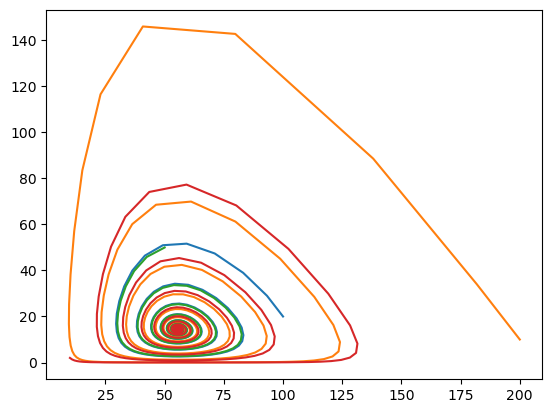

In [ ]:
for x0 in x0s:
    x = solve_rk(lv2_model(r, k, a, b, m), x0, t)
    plt.plot(x[:,0], x[:,1])

In [43]:
from sympy import symbols, Eq, solve

x1, x2 = symbols("x1 x2", real=True, positive=True)

eq1 = Eq(r*x1*(1-x1/k) - a*x1*x2, 0)
eq2 = Eq(b*x1*x2 - m*x2, 0)

x_star = solve([eq1, eq2], [x1,x2])[0]
x_star

(55.5555555555556, 14.4444444444444)

In [44]:
from scipy import optimize

eps = np.sqrt(np.finfo(float).eps)
J = optimize.approx_fprime(x_star, lv2_model(r,k,a,b,m), eps)

In [47]:
np.linalg.eig(J).eigenvalues

array([-0.0138889+0.18952096j, -0.0138889-0.18952096j])

In [52]:
x1, x2 = symbols("x1 x2", real=True, positive=True)

eq1 = Eq(r*x1 - a*x1*x2, 0)
eq2 = Eq(b*x1*x2 - m*x2, 0)

x_stars = solve([eq1, eq2], [x1,x2])
J = optimize.approx_fprime(x_stars[0], pp_model(r,a,b,m), eps, None)
x_stars, np.linalg.eig(J)

([(55.5555555555556, 20.0000000000000)],
 EigResult(eigenvalues=array([-2.98023224e-08+0.22360677j, -2.98023224e-08-0.22360677j]), eigenvectors=array([[ 7.78971243e-01+0.j        ,  7.78971243e-01-0.j        ],
        [-8.35745436e-08-0.62705965j, -8.35745436e-08+0.62705965j]])))

In [54]:
def pp3_model(r,k,gamma,delta,A,m):
    def f(x, *_):
        x0 = r*x[0]*(1-x[0]/k) - gamma*x[0]/(A+x[0])*x[1]
        x1 = delta*x[0]/(A+x[0])*x[1] - m*x[1]
        return np.array([x0, x1])
    return f

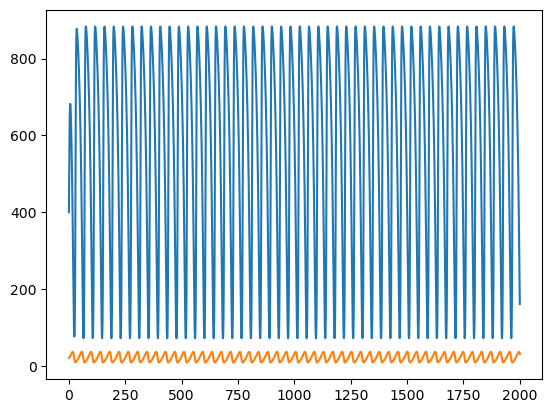

In [66]:
r = 1
gamma = 10
delta = 0.63
m = 0.5
k = 1000
A = 100

x0 = np.array([400, 20])

t = np.linspace(0, 2000, 8001)

x = solve_rk(pp3_model(r, k, gamma, delta, A, m), x0, t)

plt.plot(t, x)
plt.show()

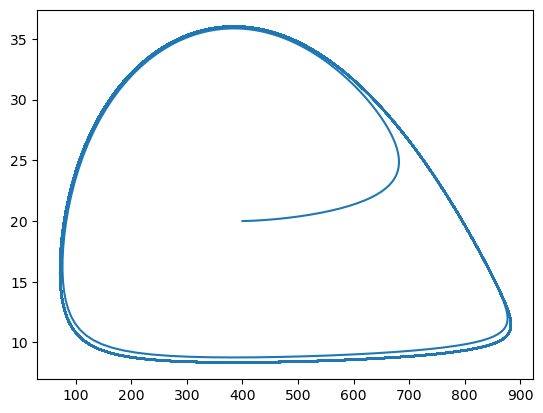

In [67]:
plt.plot(x[:,0], x[:,1])

In [70]:
x1, x2 = symbols("x1 x2", real=True, positive=True)

eq1 = Eq(r*x1*(1-x1/k) - gamma*x1/(A+x1)*x2, 0)
eq2 = Eq(delta*x1/(A+x1)*x2 - m*x2, 0)

x_star = solve([eq1, eq2], [x1, x2])
x_star

[(384.615384615385, 29.8224852071006)]

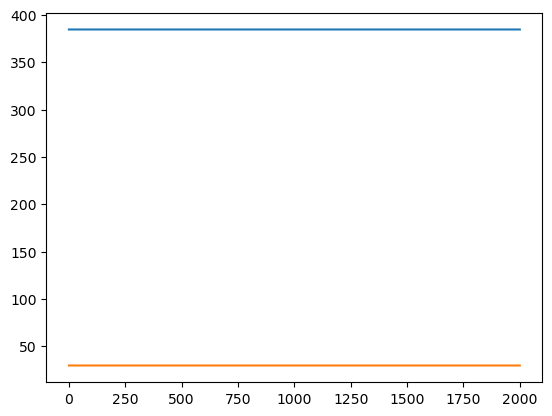

In [71]:
x = solve_rk(pp3_model(r, k, gamma, delta, A, m), np.array(x_star[0]), t)
plt.plot(t, x)

## Referencias

[1] - Hills, A. (2023). Modelling Predator-Prey Systems in Python.https://github.com/INASIC/predator-prey_systems/tree/master

[2] - Hoppensteadt, F. (2006). "Predator-prey model". Scholarpedia. p. 1563.

[3] - Velten, K. (2010). Mathematical Modeling and Simulation. Wiley.